In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# List of stock tickers
tickers = ['BWEN', 'STGW', 'PLTK']

# Create an empty DataFrame to hold the stock data
stock_data = pd.DataFrame()

# Fetch and analyze stock data for each ticker
for ticker in tickers:
    # Download historical data
    stock = yf.Ticker(ticker)
    hist_data = stock.history(period="1y")
    
    # Calculate 14-day RSI
    delta = hist_data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    # Add RSI to historical data
    hist_data['RSI'] = rsi
    
    # Append data to the main DataFrame
    hist_data['Ticker'] = ticker
    stock_data = stock_data.append(hist_data)

# Print the DataFrame
print(stock_data)

# You can perform further analysis here


/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_88370/3076562119.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(hist_data)


                           Open   High    Low  Close   Volume  Dividends  \
Date                                                                       
2022-08-19 00:00:00-04:00  3.00  3.200  2.810   3.16   149400        0.0   
2022-08-22 00:00:00-04:00  3.05  3.070  3.010   3.02   100200        0.0   
2022-08-23 00:00:00-04:00  3.02  3.490  3.020   3.44   404500        0.0   
2022-08-24 00:00:00-04:00  3.44  3.550  3.380   3.40   181400        0.0   
2022-08-25 00:00:00-04:00  3.44  3.490  3.350   3.40   131000        0.0   
...                         ...    ...    ...    ...      ...        ...   
2023-08-14 00:00:00-04:00  9.77  9.965  9.665   9.95  1629800        0.0   
2023-08-15 00:00:00-04:00  9.87  9.900  9.645   9.74  1081800        0.0   
2023-08-16 00:00:00-04:00  9.70  9.840  9.660   9.81   864400        0.0   
2023-08-17 00:00:00-04:00  9.81  9.845  9.570   9.64  1159600        0.0   
2023-08-18 00:00:00-04:00  9.50  9.605  9.360   9.39   852500        0.0   

           

/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_88370/3076562119.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(hist_data)
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_88370/3076562119.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(hist_data)


In [4]:
# Calculate the 50-day moving average
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()

# Calculate the 200-day moving average
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Calculate daily returns
stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

# Calculate volatility (30-day standard deviation of daily returns)
stock_data['Volatility'] = stock_data['Daily_Returns'].rolling(window=30).std()

# Calculate Sharpe Ratio (assuming 0% risk-free rate)
stock_data['Sharpe_Ratio'] = stock_data['Daily_Returns'].mean() / stock_data['Daily_Returns'].std()


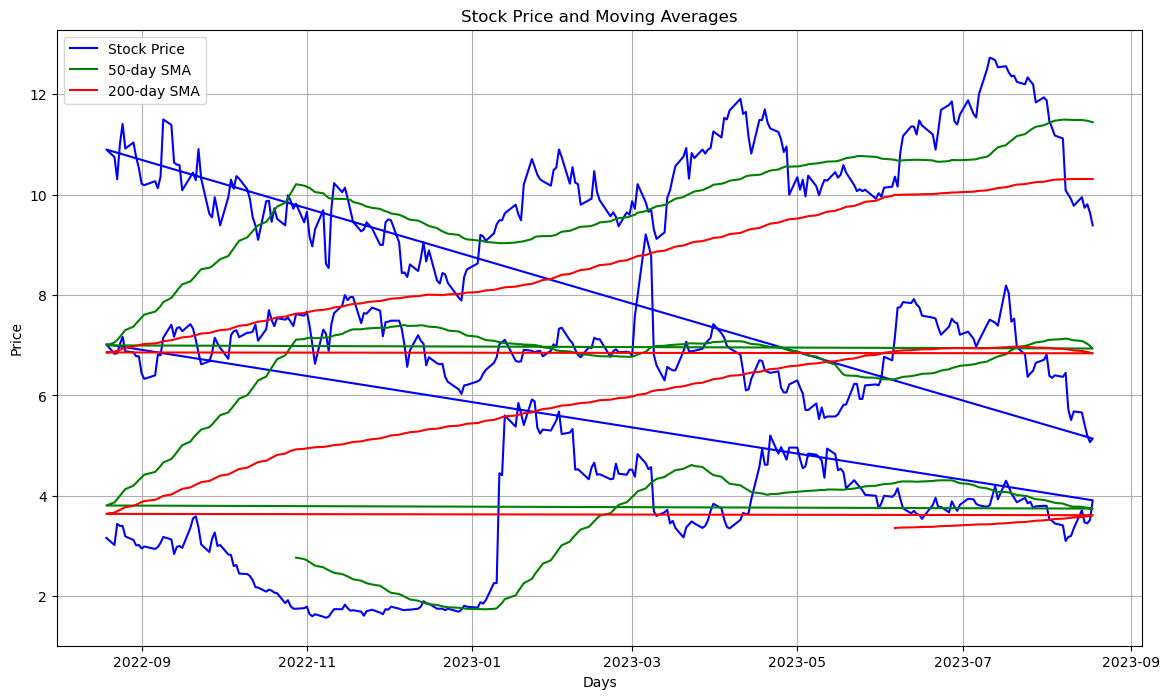

In [5]:
# Assume stock_data is your DataFrame with a 'Close' column containing stock prices
# Calculate 50-day and 200-day Simple Moving Averages
stock_data['50_SMA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_SMA'] = stock_data['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')
plt.plot(stock_data['50_SMA'], label='50-day SMA', color='green')
plt.plot(stock_data['200_SMA'], label='200-day SMA', color='red')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
